### 1. 建立這個圖

![](https://i.imgur.com/GcxOoD1.png)

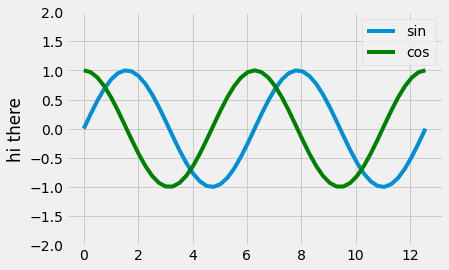

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi*4, 51)
y = np.sin(x)

plt.style.use('fivethirtyeight')

plt.plot(x, y)
plt.plot(x, np.cos(x), c='g')

plt.ylabel('hi there')
plt.ylim(-2, 2)

plt.legend(['sin', 'cos'])

plt.show()


### 2. 和這個

![](https://i.imgur.com/H8d5IBy.png)

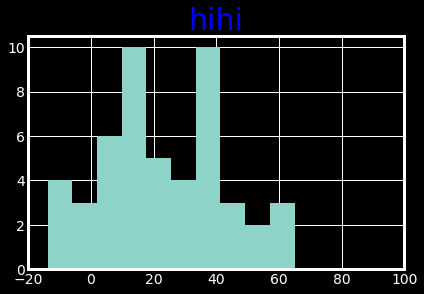

In [87]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(50) + 10 * np.random.randn(50)

with plt.style.context('dark_background'):
    plt.hist(data)
    plt.xlim(-20, 100)
    plt.title('hihi', size=30, color='b')

### 3. 請上網找兩個 plot 的範例，盡可能是比較特別的圖表

#### 圖例一 :
股票圖
* 資料來源 : https://ycy-blog.herokuapp.com/article/candlestick-plot/
* csv檔案 :　https://drive.google.com/uc?export=download&id=1u-zS3yT8KfDwhrrEzTR4O8VobjXEQt1P

<AxesSubplot:title={'center':'興富發(2542)  股價走勢圖'}>

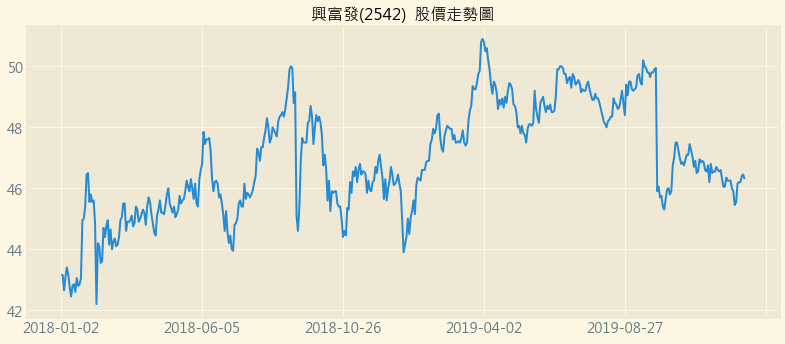

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('2542_price.csv', index_col = 0)[::-1]

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
 
df.close.plot(figsize = (12, 5),
              title = "興富發(2542)  股價走勢圖")

#### 圖例二 :
K線圖
* 資料來源 : https://ycy-blog.herokuapp.com/article/candlestick-plot/
* csv檔案 :　https://drive.google.com/uc?export=download&id=1u-zS3yT8KfDwhrrEzTR4O8VobjXEQt1P

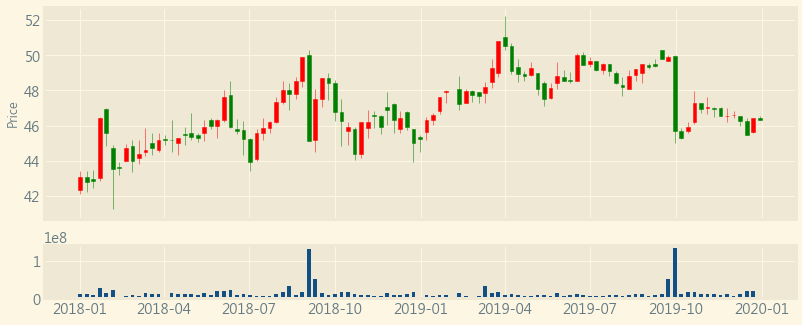

In [109]:
import mpl_finance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('2542_price.csv', index_col = 0)[::-1]

df = df[['open','high','low','close','volume']]
df.index.name = 'date'
df.index = pd.to_datetime(df.index)
df = df.astype(float)
df_ohlcv = {'open': 'first',
           'high': 'max',
           'low': 'min',
           'close': 'last',
           'volume': 'sum'}
 
df_final = df.resample('W-MON',closed='left', label='left').agg(df_ohlcv).copy()
df_final.index = mdates.date2num(df_final.index)
data_final = df_final.reset_index().values

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharex=True,
                         gridspec_kw={'height_ratios': [4, 1]})
 
mpl_finance.candlestick_ohlc(ax[0], data_final, width=4, alpha=1, colorup="red", colordown="green")
ax[1].bar(df_final.index, df_final['volume'], width=4, color='#114f85')
ax[0].set_ylabel('Price')
 
locator = mdates.AutoDateLocator()
ax[0].xaxis.set_major_locator(locator)
ax[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))